# SCRATCH PAD

The only purpose for this notebook is to house all of my random 'stuff' like code chunks, thoughts/comments, ideas etc.  No fancy formatting etc, just a paste pad that I can keep with ideas and other such things in raw form. Its like running commentary for my brain sometimes.

I am pretty happy with where the project is at this point in time in comparison to the total amount of time I have before the end of the project.
We are at the end of module 2, and we still have modules 3 and 4 to got.  I have so much time to continue exploring and visualing data, i'm really diggin this pathway.

At the end of the day, the way my brain thinks about this project is that is just one big research project where I get to use real world data and various tools and utilities to deep dive on something I find interesting.  This has been alot of fun!

Thanks to having to learn markdown for the bazillion readmes ive had to make, up to this point, for the 3 - 4 pathway/workshops ive taken, markdown has become infinitely more useful with jupiter notebooks.  Markdown cells truely are superior to code comments both in quality and the level of readibility they provide. It's little readme chunkies whenever i want them. It's almost stupid how full circle thats come, from being forced to make readmes for 4 capstone projects now and hating every second of it, to actually being greatful for the ability to use it through-out my notebook.

In [4]:
# all imports i may need for various code blocks
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from shapely.geometry import Point, Polygon

In [5]:
# 1. Load Data
world = gpd.read_file('../data/original/countries.geojson')

geopanda visual for the "who lives under the "

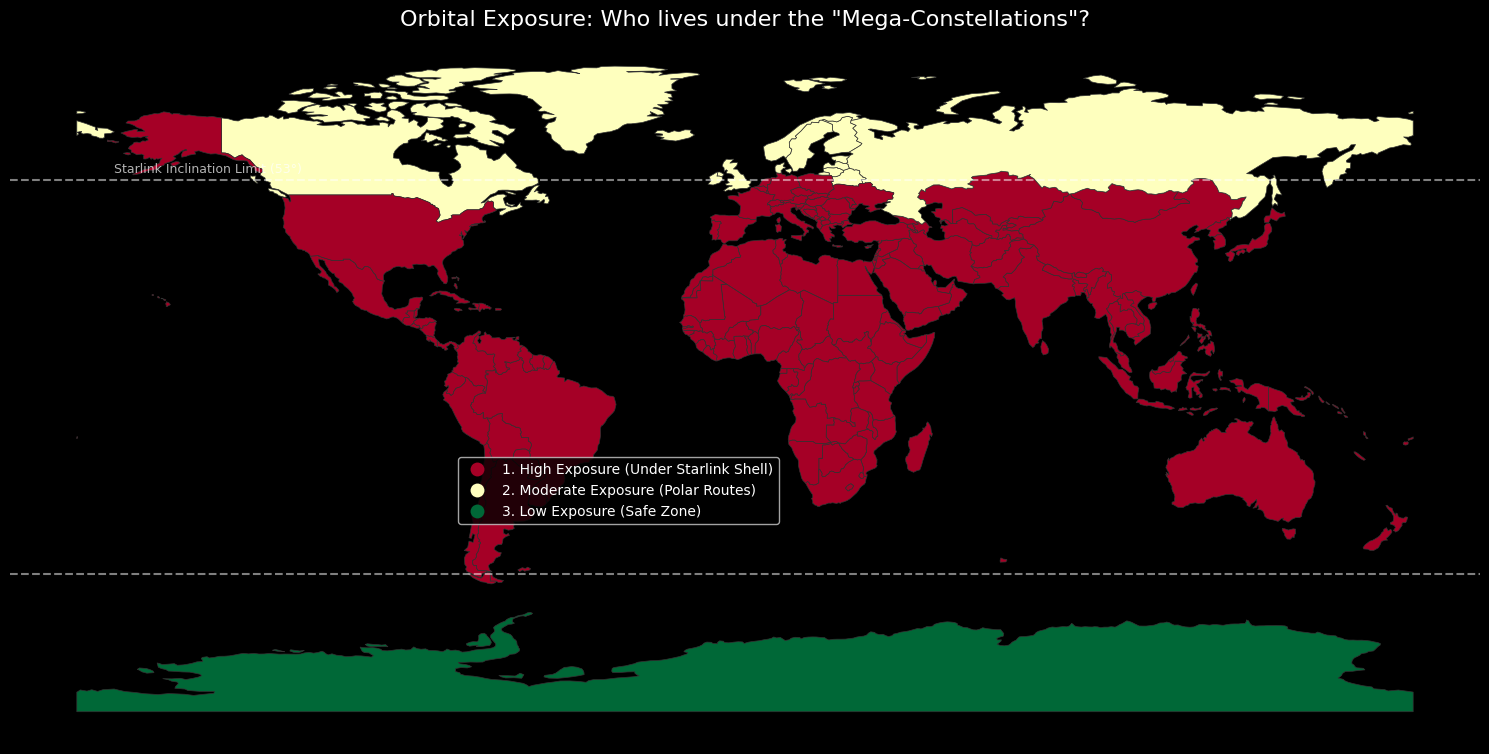

In [6]:
# 1. Convert to World Mercator (EPSG:3395) -> units become meters
# 2. Calculate Centroid
# 3. Convert back to your original Lat/Lon (world.crs)
# 4. Grab the Y (Latitude)
world['lat'] = world.to_crs("EPSG:3395").centroid.to_crs(world.crs).y.abs()

def classify_risk(lat):
    if lat < 53:
        return "1. High Exposure (Under Starlink Shell)"
    elif lat < 80:
        return "2. Moderate Exposure (Polar Routes)"
    else:
        return "3. Low Exposure (Safe Zone)"

world['risk_category'] = world['lat'].apply(classify_risk)

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(15, 8))

world.plot(
    column='risk_category',
    cmap='RdYlGn',     # Red (High Risk) -> Yellow -> Green (Safe)
    legend=True,
    ax=ax,
    edgecolor='#333333',
    linewidth=0.5
)

plt.axhline(53, color='white', linestyle='--', alpha=0.5)
plt.axhline(-53, color='white', linestyle='--', alpha=0.5)
plt.text(-170, 55, "Starlink Inclination Limit (53°)", color='white', fontsize=9, alpha=0.7)

ax.set_title('Orbital Exposure: Who lives under the "Mega-Constellations"?', fontsize=16, color='white')
ax.set_axis_off() # remove lat/lon numbers for a cleaner look

# Fix the Legend position
leg = ax.get_legend()
leg.set_bbox_to_anchor((0.3, 0.3))
for text in leg.get_texts():
    text.set_color("white")

plt.tight_layout()
plt.show()

# REORGANIZE

* I seem to have a few cleanup steps and maybe some data augmentation in my eda book(s) that may be better left in the cleanup notebook. 
* Considering strickly cleaning satcat.csv and saving a cleaned version of that, and then creating a 3rd notebook speecifically for the csv created by merging my 2 datasets.  This should allow me to maintain the integrity of the original data after cleaning that is ready to be used to create a polished dataset. The 3rd notebook would contain the merging and subsuquent cleaning/augmentation steps for the final polished dataset for the merged data.

### **"Chaos doesn't just climb. It cascades."**

### **Legacy Cadence: The Steady March**

represents the rhythmic pattern of the space industry as it existed from the dawn of the space age through approximately 2013

constant drumbeat

### **Modern Cadence: The Sprinting Pulse**

represents the fundamental shift in the industry's tempo that occurred with the rise of commercial mega-constellations

heart rate in a sprint

it is an accelerating pulse where the time between launches is rapidly shrinking.


### **First Derivative**

In calculus, the "first derivative" measures the speed of change.  


Comparing how fast launches were increasing in the old model (legacy linear) versus how fast they are increasing in the new model (modern exponential).

We use Brent's Method to find the exact year where the modern exponential growth rate officially surpassed the legacy linear growth rate.

Calculating the slopes lets us compare how fast launches were increasing in the old model versus how fast they were increasing in the new one.

### **[Brent's Method](https://en.wikipedia.org/wiki/Brent%27s_method)**


Using Brent's Method to find the exact moment where the two speeds (slopes) became equal (2014) and we interpret this as the year the transition occurs (root), because the models velocity officially surpasses the legacy trend during that calendar year.

### **Math**  

- growth models
  * two distinct mathematical functions help us characterize the two different eras of space flight:
    * steady state (linear growth): $y = mx + b$  
      * $m$ is the constant slope (legacy launch cadence) and $b$ is the intercept.
    * new space (exponential growth): $y = a \cdot e^{b(x-c)}$  
      * $a$ is the scale, $b$ is the growth rate, and $x-c$ is the time elapsed since the baseline year ($c$).
- acceleration math
  * exponential slope (($f'(x)$)): $\frac{d}{dx}[a \cdot e^{b(x-c)}] = a \cdot b \cdot e^{b(x-c)}$
    * calculates the exact slope of the exponential curve at any given year  
- root finding solver
  * root: exact year where the  exponential growth rate ($f'(x)$) officially surpassed the legacy cadence

[Derivatives of Exponential Functions - YouTube](https://www.youtube.com/watch?v=S0_qX4VJhMQ)  